# Pràctica 1:

Nom dels alumnes del grup: Johnny Astudillo, Laia Muniesa

> Recordeu que, tot i que la pràctica es fa en parelles, els dos membres del grup han de lliurar al campus virtual aquest notebook.

# Anàlisi exploratòria de dades (EDA) & ús d'eines avançades de Python

L'**anàlisi exploratòria de dades** (EDA, per les seves sigles en anglès, *Exploratory Data Analysis*) és un procés crític en la ciència de les dades que implica **explorar, resumir i visualitzar** les dades per a entendre les seves característiques principals. L'objectiu principal de l'EDA és revelar patrons, tendències i anomalies a partir de les dades, sense fer suposicions massa específiques o construir models massa complexes.

Aquí teniu alguns dels elements més importants de l'anàlisi exploratòria de dades:

+ **Visualització de dades**: A través de gràfics i gràfiques, es representen les dades per a veure distribucions, tendències i relacions. Això pot incloure histogrames, gràfics de barres, diagrames de dispersió, gràfics de caixa, etc.

+ **Estadístiques descriptives**: Es calculen estadístiques com la mitjana, la mediana, la desviació estàndard i altres mesures resum per a descriure les característiques bàsiques de les variables.

+ **Detecció d'anomalies**: Es busca identificar valors atípics o anòmals que puguin indicar errors o situacions especials en les dades.

+ **Imputació de dades faltants**: Si les dades tenen buits o valors faltants, es pot decidir com omplir aquests buits de manera adequada.

+ **Exploració de relacions**: Es busquen correlacions i relacions entre les diferents variables de les dades per a identificar connexions i dependencies.

+ **Agrupació de dades**: Es divideixen les dades en subconjunts basats en certes característiques per a analitzar-les més detingudament.

+ **Transformació de dades**: Es poden aplicar transformacions a les dades per a fer-les més adequades per a anàlisi posterior, com l'estandardització o la normalització.

* **Selecció de característiques**: Si es treballa amb un conjunt de dades amb moltes variables, es pot realitzar una selecció de característiques per a reduir la complexitat i millorar l'eficiència de l'anàlisi.

Python ofereix una àmplia gamma d'eines i biblioteques per a realitzar l'anàlisi exploratòria de dades (EDA). Algunes de les biblioteques més populars i útils són les següents:

+ **NumPy**: NumPy és una biblioteca fonamental per a la computació científica en Python. Proporciona funcionalitats per a treballar amb matrius i vectors, la qual cosa és essencial per a l'anàlisi de dades.

+ **Pandas**: Pandas és una biblioteca molt popular per a l'anàlisi de dades que ofereix estructures de dades com DataFrame i Series, que faciliten la manipulació i anàlisi de dades tabulars. Podeu utilitzar Pandas per a carregar, netejar i explorar les dades.

+ **Matplotlib**: Matplotlib és una biblioteca per a la visualització de dades que us permet crear una àmplia gamma de gràfics i gràfiques personalitzades. És ideal per a crear histogrames, diagrames de dispersió, gràfics de barres i moltes altres representacions gràfiques.

+ **Scipy**: SciPy és una biblioteca que amplia les funcionalitats de NumPy i proporciona eines addicionals per a l'anàlisi científic, inclosos estadístics i mètodes d'optimització.

+ **Scikit-learn**: Si esteu interessats en l'aprenentatge automàtic, Scikit-learn és una biblioteca essencial que ofereix eines per a la classificació, regressió, agrupació i altres tasques d'aprenentatge automàtic. També conté eines per a la selecció de característiques.

+ **Seaborn**: Seaborn és una biblioteca de visualització de dades basada en Matplotlib que simplifica la creació de gràfics estadístics atractius i informatius. És especialment útil per a la visualització de relacions i tendències en les dades.

## 0. Objectiu de la pràctica

L'**objectiu d'aquesta pràctica** és aprendre com fer una exploració sobre un conjunt de dades real, que al final ens permeti obtenir la resposta a diverses preguntes.

En aquesta pràctica explorarem les dades dels trajectes dels **taxis grocs de la ciutat de Nova York** durant varios anys.

En finalitzar aquesta pràctica, haureu de ser capaços de respondre la pregunta següent de forma detallada:

- **Com va afectar la pandèmia de la Covid l'ús dels taxis a Nova York?**

Pere respondre aquesta pregunta tant genèrica, ho descomposarem en preguntes més concretes:

- Quina distribució d'encàrrecs segueixen els taxis i quina distància / durada tenen?
- Quines són les zones on m'és / menys taxis s'agafen?
- Quins horaris són els més usuals?
- Quins dies de la setmana i del mes s'utilitzen més?
- Etc.

### Instal·lació i importació de les llibreries necessàries

A més a més de les llibreries comentades, farem servir aquests mòduls de Python:

+ **PyArrow**: PyArrow és una biblioteca de Python que es fa servir per a l'intercanvi eficient de dades entre Python i altres llenguatges de programació, especialment C++ i Java. Aquesta biblioteca es desenvolupa com a part del projecte Apache Arrow, que és un projecte de codi obert dissenyat per a millorar el rendiment i la interoperabilitat de l'analítica de dades i les tecnologies relacionades. PyArrow permet la creació i la manipulació eficient de dades en forma de taules i columnes. PyArrow ofereix suport per a l'estructura de dades coneguda com a "Table", que és similar a una taula o un quadern de dades en altres llenguatges. Aquesta estructura de dades facilita l'organització i la manipulació de dades tabulars.
+ **pyshp** és una biblioteca de Python que es fa servir per a llegir i escriure arxius en el format de fitxers de forma (shapefiles). El format de fitxers de forma és un format estàndard en geoinformàtica i geodèsia per a emmagatzemar i intercanviar dades geoespacials, com ara punts, línies i polígons, juntament amb les seves propietats associades.
+ **shapely** és una biblioteca de Python que es fa servir per a realitzar operacions geomètriques i anàlisi espacial amb objectes geoespacials. Aquesta biblioteca és especialment útil per a treballar amb geometria plana, com ara punts, línies i polígons, i permet realitzar una àmplia gamma d'operacions, com ara interseccions, unions, àrees, longituds i moltes altres.
+ **descartes** és una biblioteca de tercers que es fa servir per a la visualització de gràfics geoespacials.

In [35]:
%%capture
! pip install pyarrow
! pip install pyshp==2.1.3
! pip install shapely==1.8.0
! pip install pandas==1.5.3
! pip install numpy==1.22
! pip install descartes==1.1.0

In [36]:
import pandas as pd
import numpy as np
import urllib.request
import zipfile
import os
from tqdm.notebook import tqdm
import pyarrow.parquet as pq

In [37]:
import shapefile
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Descàrrega de dades

In [38]:
# Variables globals: els anys que estudiarem
YEARS = [2019, 2020, 2021]

In [39]:
# Descàrrega de les dades: Trip Record Data
# https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

for year in tqdm(YEARS):
    if not os.path.exists(f'data/{year}'):
        os.makedirs(f'data/{year}', exist_ok=True)
        for month in tqdm(range(1, 13)):
            urllib.request.urlretrieve(f'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month:02d}.parquet', f'data/{year}/{month:02d}.parquet')

  0%|          | 0/3 [00:00<?, ?it/s]

## 2. Neteja de dades

Per tal de tenir unes dades netes i útils, eliminarem totes aquells trajectes (files del conjunt de dades)  que continguin informació *corrupte*. Per exemple, com a mínim cal verificar que no es dóna cap d'aquests casos:

- Presència de *missing data* (camps/columnes de les dades sense valor).
- L'hora de recollida és posterior a la finalització del trajecte.
- Les dades s'importen per mes i any. Són coherents els valors que contenen les dades?
- Hi ha viatges amb un nombre absurd de passatgers?
- Hi ha viatges massa llargs o massa curts?
- Hi ha pagaments negatius?
- Etc.

A més a més, podem considerar aspectes concrets d'aquestes dades:

+ Hi pot haver viatges impossibles segons la normativa:
    + [Més viatgers que els permesos](https://www1.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page) o [velocitats il·legals](https://www.speed-limits.com/newyork).
    + [Limit de persones permeses a un yellow taxicab](https://drive.google.com/file/d/1eiV7wdm7WrkRlM9bmekCRM6GY3Yq6GI2/view?usp=sharing)

De totes les columnes que tenen les dades, només cal fer servir les següents per contestar les preguntes:

- *tpep_pickup_datetime*: The date and time when the meter was engaged.
- *tpep_dropoff_datetime*: The date and time when the meter was disengaged.
- *Passenger_count*: The number of passengers in the vehicle.
- *Trip_distance*: The elapsed trip distance in miles reported by the taximeter.
- *PULocationID*: TLC Taxi Zone in which the taximeter was engaged
- *DOLocationID*: TLC Taxi Zone in which the taximeter was disengaged
- *Payment_type*: A numeric code signifying how the passenger paid for the trip.
    - 1= Credit card
    - 2= Cash
    - 3= No charge
    - 4= Dispute
    - 5= Unknown
    - 6= Voided trip
- *Fare_amount*: The time-and-distance fare calculated by the meter.
- *Total_amount*: The total amount charged to passengers.

In [40]:
# carreguem les dades a un dataframe de pandas
# Per agilitzar els càlculs i reduir el temps de càlcul durant el desenvolupament,
# podeu treballarem amb una mostra uniforme de les dades (1 fila de cada 1000).

def load_table(year, month, sampling = 100):
    """
    Funció que llegeix les dades descarregades i les converteix a un DataFrame
    """
    data = pq.read_table(f'data/{year}/{str(month).zfill(2)}.parquet').to_pandas()
    required_data = ['tpep_pickup_datetime',
                 'tpep_dropoff_datetime',
                 'passenger_count',
                 'trip_distance',
                 'PULocationID',
                 'DOLocationID',
                 'payment_type',
                 'fare_amount',
                 'total_amount']
    return data[required_data][::sampling]

# explorem una mica les dades
test = load_table(2019, 1)
test.shape

(76967, 9)

In [41]:
test.tail(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
7695700,2019-01-30 22:40:39,2019-01-30 22:41:55,NaN,0.17,256,256,0,39.95,43.0
7695800,2019-01-31 06:58:00,2019-01-31 07:44:00,NaN,17.57,108,56,0,77.45,81.0
7695900,2019-01-31 07:46:00,2019-01-31 08:37:00,NaN,10.85,91,231,0,37.19,46.5
7696000,2019-01-31 09:00:00,2019-01-31 09:45:00,NaN,4.11,162,231,0,35.95,39.5
7696100,2019-01-31 11:18:35,2019-01-31 11:41:41,NaN,4.52,244,75,0,29.45,32.5
7696200,2019-01-31 14:01:00,2019-01-31 15:08:00,NaN,16.32,36,21,0,59.15,62.7
7696300,2019-01-31 15:35:00,2019-01-31 15:55:00,NaN,4.96,18,220,0,26.31,32.5
7696400,2019-01-31 17:11:00,2019-01-31 18:05:00,NaN,14.78,107,130,0,50.69,60.0
7696500,2019-01-31 18:33:00,2019-01-31 18:58:00,NaN,8.80,107,69,0,39.45,43.0
7696600,2019-01-31 23:31:07,2019-01-31 23:51:40,NaN,9.17,140,47,0,43.45,46.5


###  Exercici A

+ Un cop llegides les dades a una taula de Pandas, implementa una funció que faci el procés de neteja que consideris necessari. Per determinar què és necessari, explora els valors que apareixen a cada columna del dataframe de Pandas i decideix què cal fer.

> *Nota: Les columnes `Datatime` són un subtipus de dades de Pandas anomenades `datetime`.  Busca com tractar de forma eficient aquest tipus de dades en Pandas.*

In [42]:
def clean_data(data, year, month):
    """
    Funció que neteja (una mostra de) les dades per un mes i un any donat.

    Params
    ======
    :data: DataFrame amb les dades a netejar.
    :year: Enter que indica l'any de les dades a netejar.
    :month: Enter que indica el mes de les dades a netejar.

    Returns
    =======
    :data: DataFrame amb les dades validas.
    """

    # Traiem les dades nul·les
    data = data[data.notnull()]

    # Traiem les sortidas amb data anterior a la recollida
    data = data[data['tpep_dropoff_datetime'] > data['tpep_pickup_datetime']]

    # Traiem les dades amb data incorrecta
    data = data[(data['tpep_pickup_datetime'].dt.year == year) & (data['tpep_dropoff_datetime'].dt.year == year)]
    data = data[(data['tpep_pickup_datetime'].dt.month == month) & (data['tpep_dropoff_datetime'].dt.month == month)]

    # Traiem les dades amb un nombre de passatgers incoherent
    data = data[data['passenger_count'].isin([1,2,3,4,5])]

    # Traiem les dades amb una tarifa i pagament inferiors al mínim
    data = data[(data['fare_amount'] > 3) & (data['total_amount'] > 3)]

    # Traiem les dades amb un pagament inferior a la tarifa marcada
    data = data[data['fare_amount'] <= data['total_amount']]

    # Traiem les dades amb un trajecte ínfim o extraordinari
    data = data[(data['trip_distance'] >= 0.6) & (data['trip_distance'] <= 100)]

    # Traiem les dades amb tipus de pagament invàlid
    data = data[data['payment_type'].isin([1,2,3,4,5,6])]

    # Traiem les dades amb velocitats superiors al límit
    times = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 3600
    speeds = data['trip_distance'] / times
    data = data[(speeds <= 55) & (speeds >= 5)]

    return data

In [43]:
test = load_table(2019, 1)
test2 = clean_data(test, 2019, 1)
test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63531 entries, 0 to 7667900
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   63531 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  63531 non-null  datetime64[ns]
 2   passenger_count        63531 non-null  float64       
 3   trip_distance          63531 non-null  float64       
 4   PULocationID           63531 non-null  int64         
 5   DOLocationID           63531 non-null  int64         
 6   payment_type           63531 non-null  int64         
 7   fare_amount            63531 non-null  float64       
 8   total_amount           63531 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(3)
memory usage: 4.8 MB


###  Exercici B

+ Escriu una funció que transformi la taula original a una nova taula, més adequada per tal de dur a terme l'exploració necessària. Podeu afegir columnes addicionals, precalcular valors, etc.

> Per exemple, podem trasnformar les dades per treballar amb les unitats de kilòmetres i hores per a representar les durades, distàncies i velocitats del trajecte. El motiu és, per una banda, que estem familiaritzades amb el Sistema Internacional d'Unitats (d'aquí el canvi de milles a km). I per altra, optar pels km i no pels metres degut a l'ordre de magnitud de les dades.

In [44]:
MILLA_A_QUILOMETRE = 1.60934
DOLAR_A_EURO = 0.95
SEGONS_A_HORA = 3600

def post_processing(data):
    """
    Canvia les unitats del DataFrame a les europees i s'afegeixen columnes útils
    per a l'exploració.

    Params
    ======
    :data: DataFrame amb les dades a processar.

    Returns
    =======
    :new_data: DataFrame amb les dades processades.
    """

    # Evita modificar les dades originals
    new_data = data.copy()

    # Passa les dades a unitats europees
    new_data['trip_distance'] = round(data['trip_distance'] * MILLA_A_QUILOMETRE, 2)
    new_data['fare_amount'], new_data['total_amount'] = round(data['fare_amount'] * DOLAR_A_EURO, 2), round(new_data['total_amount'] * DOLAR_A_EURO, 2)

    # Afegim columnes útils
    new_data['year'] = new_data['tpep_pickup_datetime'].dt.year
    new_data['month'] = new_data['tpep_pickup_datetime'].dt.month
    new_data['pickup_hour'] = new_data['tpep_pickup_datetime'].dt.hour
    new_data['dropoff_hour'] = new_data['tpep_dropoff_datetime'].dt.hour
    new_data['pickup_day'] = new_data['tpep_pickup_datetime'].dt.day
    new_data['dropoff_day'] = new_data['tpep_dropoff_datetime'].dt.day
    new_data['pickup_week'] = new_data['tpep_pickup_datetime'].dt.isocalendar().week
    new_data['dropoff_week'] = new_data['tpep_dropoff_datetime'].dt.isocalendar().week
    new_data['trip_duration'] = round((new_data['tpep_dropoff_datetime'] - new_data['tpep_pickup_datetime']).dt.total_seconds() / SEGONS_A_HORA, 2)
    new_data['speed'] = round(new_data['trip_distance'] / new_data['trip_duration'], 2)

    return new_data

In [45]:
test3 = post_processing(test2)
test3.tail()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,year,month,pickup_hour,dropoff_hour,pickup_day,dropoff_day,pickup_week,dropoff_week,trip_duration,speed
7667100,2019-01-31 23:23:36,2019-01-31 23:35:43,1.0,3.38,264,140,1,9.50,12.16,2019,1,23,23,31,31,5,5,0.20,16.90
7667300,2019-01-31 23:52:01,2019-01-31 23:57:25,1.0,1.93,142,239,1,6.18,8.89,2019,1,23,23,31,31,5,5,0.09,21.44
7667400,2019-01-31 15:31:51,2019-01-31 15:43:41,3.0,2.61,186,161,1,9.02,12.82,2019,1,15,15,31,31,5,5,0.20,13.05
7667600,2019-01-31 23:13:39,2019-01-31 23:19:36,1.0,3.52,142,151,1,7.60,10.60,2019,1,23,23,31,31,5,5,0.10,35.20
7667900,2019-01-31 23:32:17,2019-01-31 23:47:35,2.0,4.06,164,113,1,10.92,13.30,2019,1,23,23,31,31,5,5,0.26,15.62


Amb això podem crear un nou dataset (una única taula) que contingui tota la informació dels anys: 2019, 2020, 2021.

In [46]:
df = pd.concat([clean_data(load_table(year, month), year, month)
                for year in tqdm(YEARS)
                for month in tqdm(range(1, 13), leave = False)])
df = post_processing(df)

df.tail()

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,year,month,pickup_hour,dropoff_hour,pickup_day,dropoff_day,pickup_week,dropoff_week,trip_duration,speed
3111500,2021-12-31 23:37:33,2021-12-31 23:53:36,1.0,14.16,138,141,1,24.70,54.72,2021,12,23,23,31,31,52,52,0.27,52.44
3111600,2021-12-31 23:24:02,2021-12-31 23:35:34,2.0,1.61,161,237,1,8.07,16.43,2021,12,23,23,31,31,52,52,0.19,8.47
3111700,2021-12-31 23:11:50,2021-12-31 23:36:38,1.0,23.24,132,198,1,38.00,50.23,2021,12,23,23,31,31,52,52,0.41,56.68
3111800,2021-12-31 23:28:57,2021-12-31 23:35:36,1.0,1.95,237,229,1,6.65,12.35,2021,12,23,23,31,31,52,52,0.11,17.73
3111900,2021-12-31 23:28:54,2021-12-31 23:42:18,2.0,4.18,151,141,1,10.92,17.44,2021,12,23,23,31,31,52,52,0.22,19.00


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144079 entries, 0 to 3111900
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   tpep_pickup_datetime   1144079 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  1144079 non-null  datetime64[ns]
 2   passenger_count        1144079 non-null  float64       
 3   trip_distance          1144079 non-null  float64       
 4   PULocationID           1144079 non-null  int64         
 5   DOLocationID           1144079 non-null  int64         
 6   payment_type           1144079 non-null  int64         
 7   fare_amount            1144079 non-null  float64       
 8   total_amount           1144079 non-null  float64       
 9   year                   1144079 non-null  int64         
 10  month                  1144079 non-null  int64         
 11  pickup_hour            1144079 non-null  int64         
 12  dropoff_hour           11440

## 3. Visualització de dades anuals

Començarem per obtenir una resposta quantitativa a la pregunta **S'ha incrementat o ha disminuït amb la covid la quantitat de viatges anuals fets amb taxis?**, n'hi ha prou amb crear una figura de barres on es visualitzin la quantitat de viatges per any.

### Exercici C

+ Escriu una funció basada en `matplotlib` que generi aquesta gràfica.

In [48]:
def bar_plot(df, column, xlabel, ylabel, title, labels):
    """
    Crea una figura de barres a partir de la columna d'un dataframe.

    Params
    ======
    :df: DataFrame amb les dades
    :column: String amb el nom de la columna amb les dades
    :xlabel: String amb la descripció del eix horitzontal
    :ylabel: String amb la descripció del eix vertical
    :title: String amb el títol del gràfic
    :labels: Llista amb les coordenades horitzontals de les barres
    """

    # Extrau el recompte de les dades agrupades en funció de la columna
    heights = df.groupby(column).size().values

    # Configura el text del gràfic
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Genera el gràfic
    plt.bar(labels, heights, align='center', alpha=0.7)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Mostra el gràfic
    plt.show()

+ Visualitza el nombre de viatges de cada any.

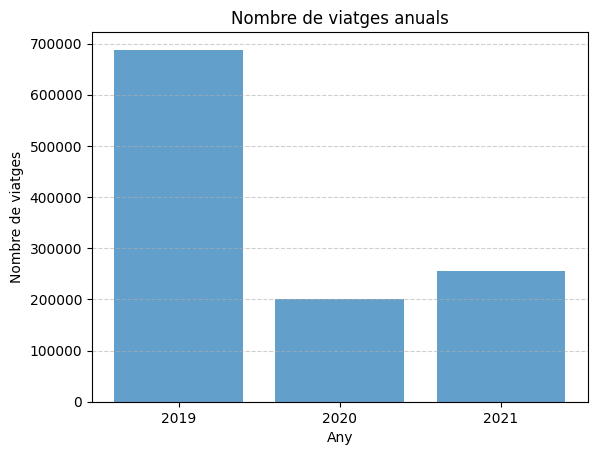

In [49]:
labels = [str(i) for i in YEARS] # Llista amb les etiquetes de les coordenades de les dades
bar_plot(df, 'year', 'Any', 'Nombre de viatges', 'Nombre de viatges anuals', labels)

**S'ha incrementat o ha disminuït amb la covid la quantitat de viatges anuals fets amb taxis?**

> Resposta: Com era d'esperar, la quantitat de viatges anuals va disminuir molt respecte a l'any anterior a la covid (2019). Tot i això, creiem que l'any 2021 tornarien a augmentar significativament però no va ser així, ja que el progrés va ser gradualment.

+ Visualitza ara en tres gràfiques, el nombre de viatges per mesos de cada any, fent servir la funció anterior.

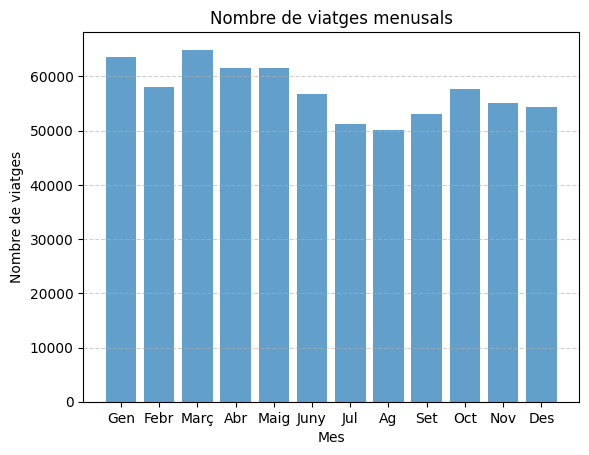

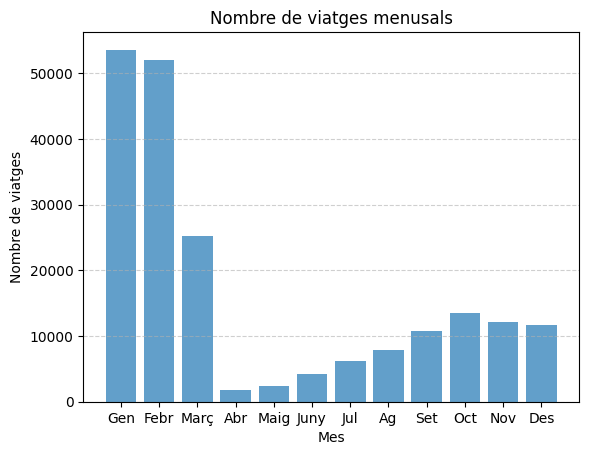

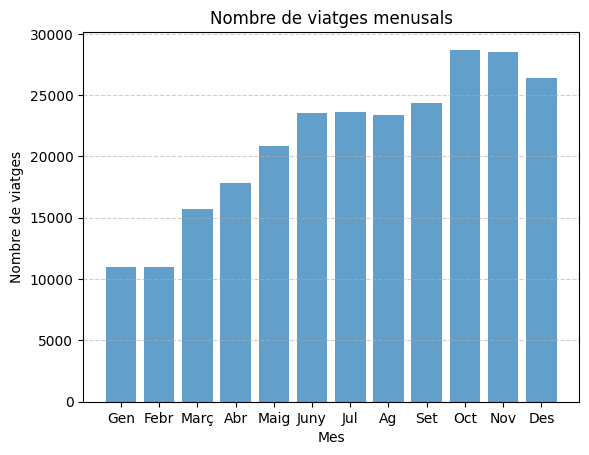

In [50]:
# Llista amb les etiquetes de les coordenades de les dades
labels = ['Gen', 'Febr', 'Març', 'Abr', 'Maig', 'Juny', 'Jul', 'Ag', 'Set', 'Oct', 'Nov', 'Des']

for year in YEARS:
    data = df[df['year'] == year]
    bar_plot(data, 'month', 'Mes', 'Nombre de viatges', 'Nombre de viatges menusals', labels)

+ És el comportament que esperàveu? Per què?

> Resposta:
Si, perquè des de l'any 2019 fins al febrer de 2020, hi ha un gran nombre de viatges, no obstant a partir del març del 2020 s'observa una baixa important (a causa del confinament per culpa de la COVID-19). Posteriorment, hi va haver poc a poc, una recuperació a mitjans del 2021 però sense arribar al mateix grau que durant l'any 2019, segurament degut a les normes i restriccions sanitàries.



+ Visualitza **quants passatgers hi ha per taxi i per any**. Crea una figura **amb tres subfigures** (una per any) on es pugui veure el recompte de passatgers per any. Després repetiu el mateix gràfic visualitzant el % (utilitzeu el paràmetre *norm = True*).

In [51]:
def passengers_taxi_year(df, ylim, xlabel, ylabel, title, norm=False):
    """
    Visualitza quants passatgers hi ha per taxi i per any.

    Params
    ======
    :df: DataFrame amb les dades
    :ylim: Tupla amb les coordenades limit del eix vertical
    :xlabel: String amb la descripció del eix horitzontal
    :ylabel: String amb la descripció del eix vertical
    :title: String amb el títol del gràfic
    :norm: Boolean que indica si les dades es volen normalitzar o no. False per defecte
    """

    # Si es vol normalitzar, calcula el recompte de passatgers com a percentatge
    if norm:
        total_passengers = [group['passenger_count'].value_counts() / len(group) for _, group in df.groupby('year')]

    # Si no es vol normalitzar, calcula el recompte de passatgers
    else:
        total_passengers = [group['passenger_count'].value_counts() for _, group in df.groupby('year')]

    # Crea la figura
    fig = plt.figure(figsize=(15, 5))

    # Crea una figura amb tres gràfiques (una per any)
    for i, data in enumerate(total_passengers):
        p = fig.add_subplot(1, 3, i + 1)
        p.set_title(f'Any {YEARS[i]}')
        p.set_xlabel(xlabel)
        p.set_ylabel(ylabel)
        p.set_ylim(ylim)
        sns.barplot(x=data.index, y=data.values)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

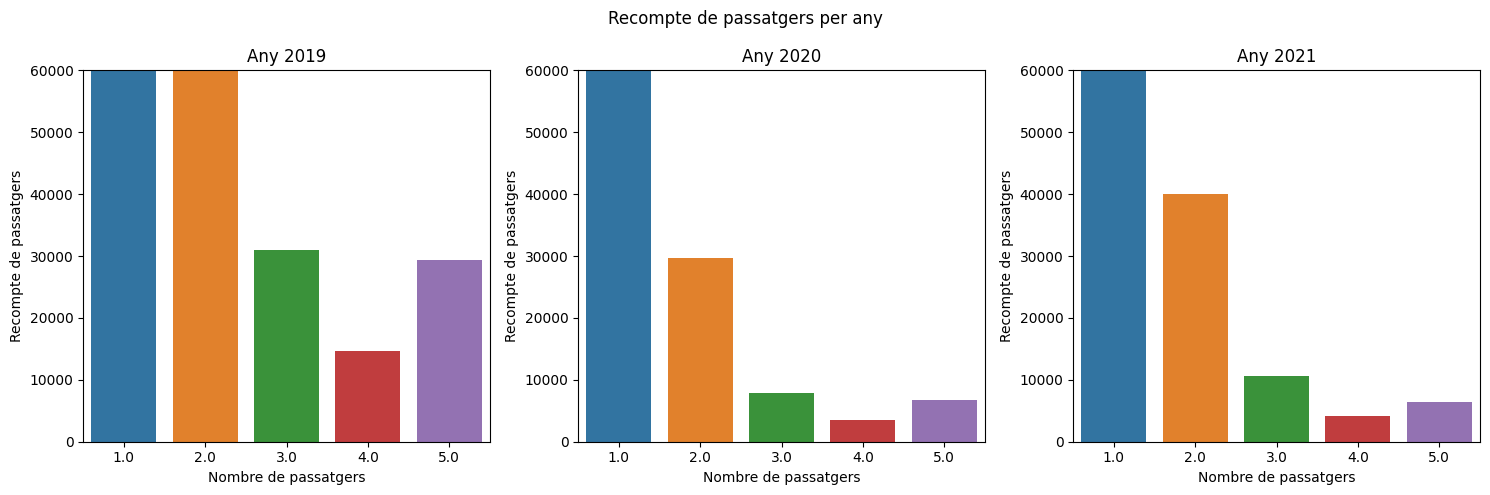

In [52]:
passengers_taxi_year(df,
                     (0, 60000),
                     'Nombre de passatgers',
                     'Recompte de passatgers',
                     'Recompte de passatgers per any')

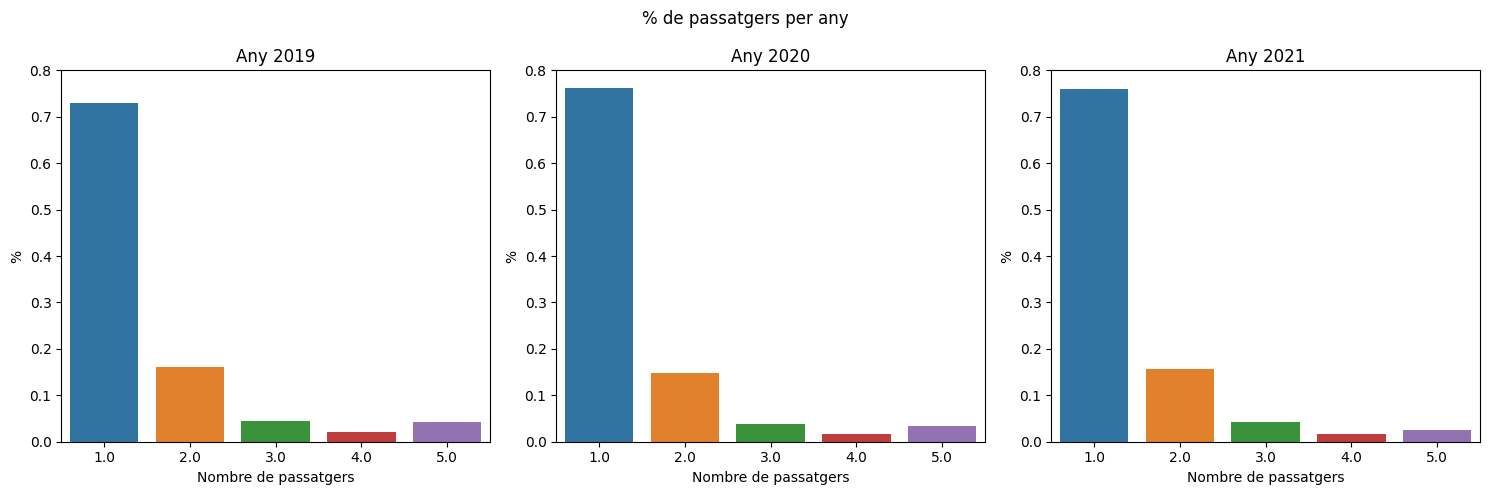

In [53]:
passengers_taxi_year(df,
                     (0, 0.8),
                     'Nombre de passatgers',
                     '%',
                     '% de passatgers per any',
                     norm = True)

+ Com descriurieu de forma **qualitativa** l'efecte de la covid sobre els taxis en base a l'anàlisi fet fins ara?

> Resposta: Podriem dir que la covid no ha afectad directament al nombre de passatjers, sino el nombre de viatjes. Això ho podem veure representat en les gràfiques, si observem, veurem que independentment de l'any el nombre de passatgers predominant sempre es 1, per lo que podem concloure que es lo més comú.

+ Podeu calcular de forma **quantitativa** la magnitud dels canvis que heu detectat? Escriviu una funció que calculi una sèrie d'indicadors quantitatius (per exemple, quin canvi percentual hi ha en el nombre de viatges d'una sola persona, etc.).

+ Descriviu els resultats quantitatius que heu obtingut.

> Resposta:

## 4. Quantitat de viatges

Fins ara hem vist la quantitat de viatges que hi ha hagut a nivell de mesos i anys.

Ara podem estudiar l'efecte de la covid en el nombre de trajectes si **agreguem** les dades per hores, dies de la setmana, setmanes de l'any, etc.

### Exercici D

+ Escriu una funció genèrica que visualitzi el nombre de trajectes per les agregacions de dades comentades i per cada any. Fes servir gràfics de línies discontínues (una línia per cada any) per veure'n l'evolució i marca amb una rodona o creu allà on està el valor.

In [54]:
def visualize_trips(df, columns, title, xlabel, ylabel):
    """
    Visualitza els viatges per diferents agregacions de dades

    Params
    ======
    :df: Dataframe amb les dades
    :columns: Llista amb les columnes agregades
    :title: String amb el títol del gráfic
    :xlanel: String amb la descripció del eix horitzontal
    :ylabel: String amb la descripció del eix vertical
    """

    # Extraiem el nombre de recollides i baixades en funció de la columna i l'any
    pickup_data = [x[columns[0]].value_counts(sort=False) for _, x in df.groupby('year')]
    dropoff_data = [x[columns[1]].value_counts(sort=False) for _, x in df.groupby('year')]


    # Configurem el gràfic
    fig = plt.figure(figsize=(15, 7))

    # Genera la primera gràfica
    p = fig.add_subplot(1,2,1)

    for i, d in enumerate(pickup_data):
        p.set_xlabel(xlabel)
        p.set_ylabel(ylabel)
        p.set_title('Recollides')
        p.grid(True)
        p.plot(d.values, linestyle='--', marker='o', label=f'Any {YEARS[i]}')
        p.legend()

    # Genera la segona gràfica
    p = fig.add_subplot(1,2,2)

    for i, d in enumerate(dropoff_data):
        p.set_xlabel(xlabel)
        p.set_ylabel(ylabel)
        p.set_title('Arribades')
        p.grid(True)
        p.plot(d.values, linestyle='--', marker='x', label=f'Any {YEARS[i]}')
        p.legend()

    # Mostra el gràfic
    plt.suptitle(title)
    plt.show()

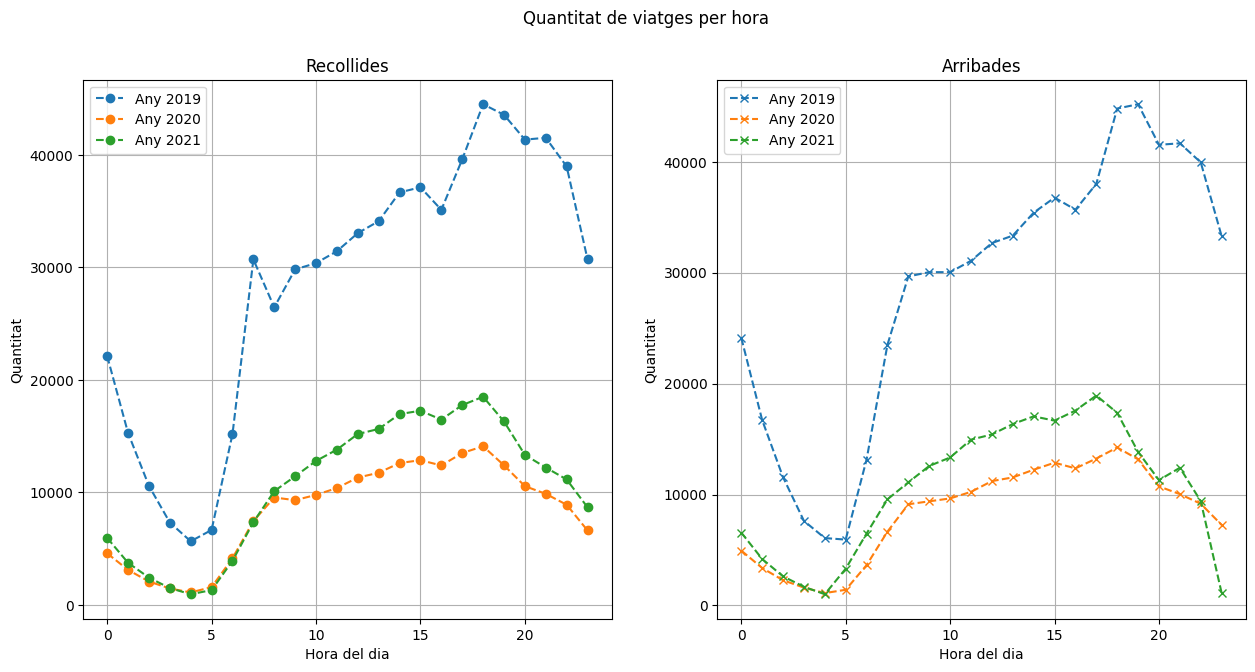

In [55]:
visualize_trips(df,
                ['pickup_hour', 'dropoff_hour'],
                title = 'Quantitat de viatges per hora',
                xlabel = 'Hora del dia', ylabel = 'Quantitat')

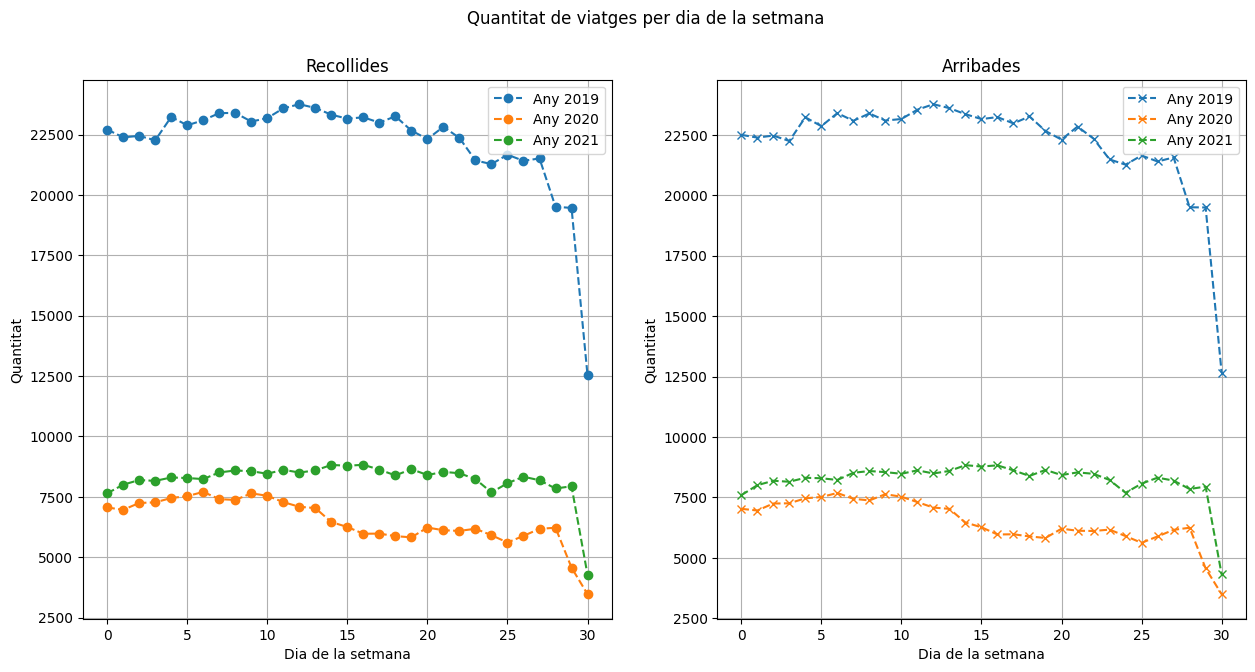

In [56]:

visualize_trips(df,
                ['pickup_day', 'dropoff_day'],
                title = 'Quantitat de viatges per dia de la setmana',
                xlabel = 'Dia de la setmana',
                ylabel = 'Quantitat')

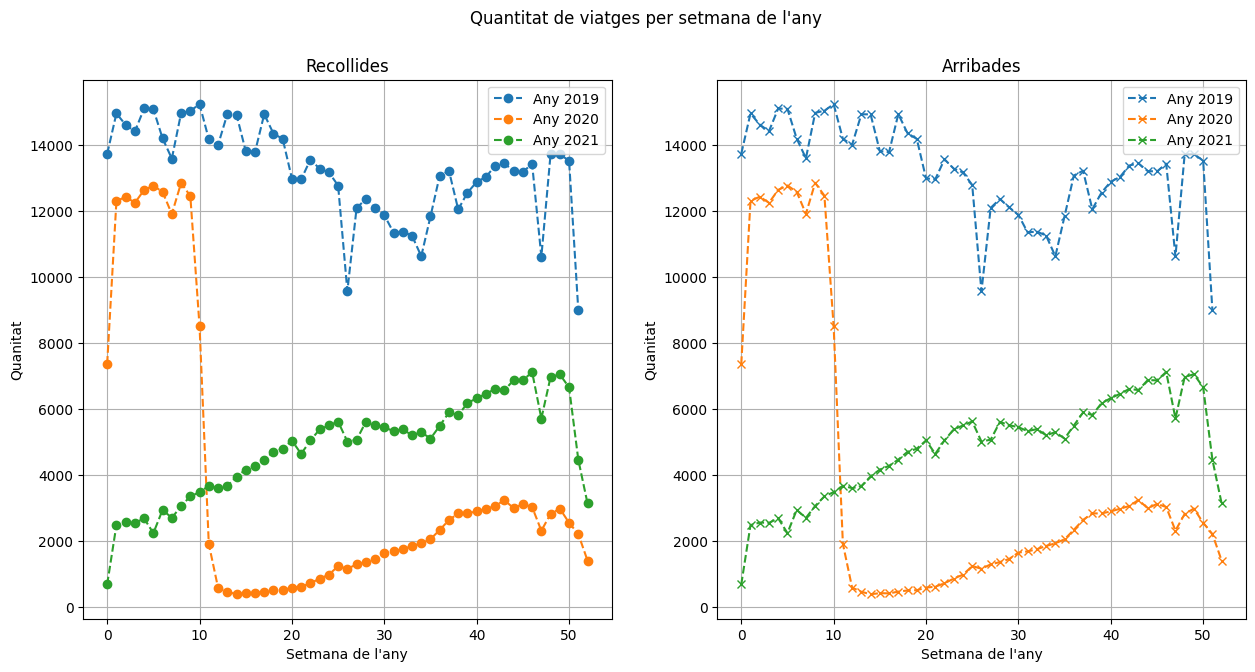

In [57]:
visualize_trips(df,
                ['pickup_week', 'dropoff_week'],
                title = 'Quantitat de viatges per setmana de l\'any',
                xlabel = 'Setmana de l\'any',
                ylabel = 'Quanitat')

+ Com descriurieu l'efecte de la covid en cada cas (si és que en té)? Quin creieu que és el motiu?

> Resposta: Als dos primers gràfics (viatgers per hora i per dies) podem observar que als anys 2020 i 2021 hi ha molts menys viatges que l'any 2019. Respecte a l'últim gràfic, es pot veure quin va ser el començament de la pandèmia, aproximadament a la setmana 11 on es veu una gran baixada dels viatgers.
Com tots sabem, el motiu d'aquesta baixada dels viatges va ser la pandèmia de COVID-19, el confinament i les restriccions.

## 5. Relació distancia, temps i velocitat

A les dades tenim la **distància** que ha recorregut el taxi en cada viatge i de la informació temporal podem extreure també la **durada** d'aquest.

Ara explorarem com la covid va afectar les distàncies i les durades dels viatges, i també la velocitat dels taxis. També ens preguntarem si la densitat de trànsit va variar.

### Exercici E

+ Per començar, escriu una funció que visualitzi els **histogrames** de distància i durada per any.

In [58]:
def visualize_histograms(df, column, title, xlabel, ylabel, xlim):
    """
    Crea un histograma a partir de la informació extreta d'una columna d'un DataFrame

    Params
    ======
    :df: DataFrame amb les dades
    :column: String amb el nom de la columna amb les dades
    :title: Títol del gràfic
    :xlabel: Text del eix horitzontal
    :ylabel: Text del eix vertical
    :xlim: Tupla amb els limits del eix horitzontal
    """

    # Configura el gràfic
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(xlim)

    # Extreiem les dades de la columna
    data = [group[column].values for _, group in df.groupby('year')]

    #Genera la gràfica
    plt.hist(data, histtype='bar', label=YEARS, bins=50)

    # Mostra el gràfic
    plt.legend()
    plt.show()

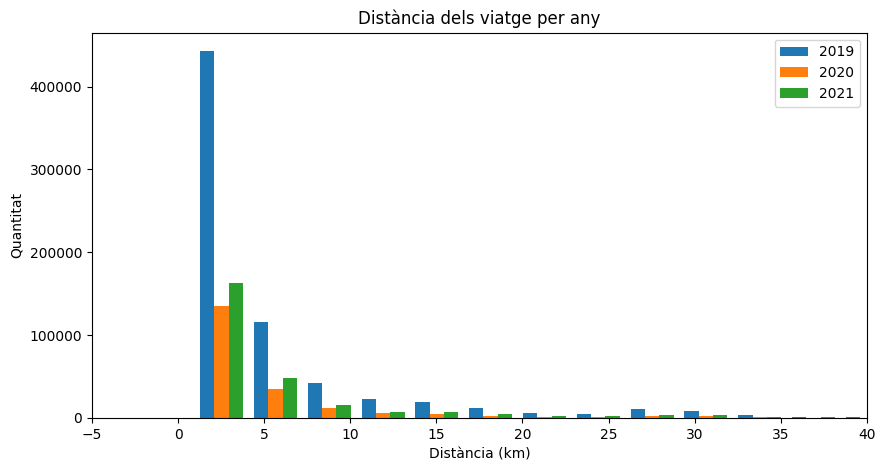

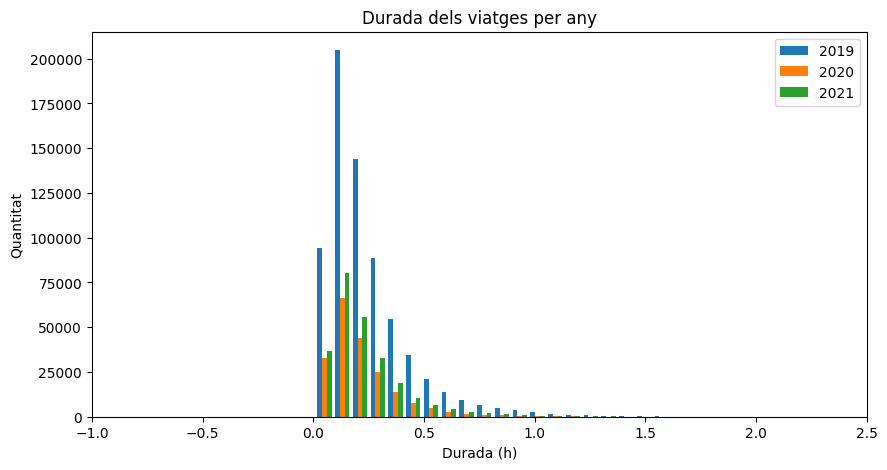

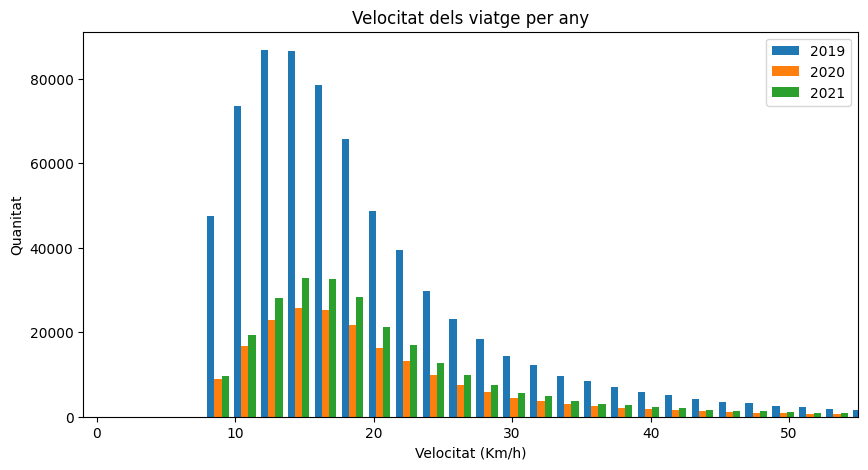

In [59]:
visualize_histograms(df, 'trip_distance', title = 'Distància dels viatge per any',
                     xlabel = 'Distància (km)', ylabel = 'Quantitat', xlim = (-5, 40))

visualize_histograms(df, 'trip_duration', title = 'Durada dels viatges per any',
                     xlabel = 'Durada (h)', ylabel = 'Quantitat', xlim = (-1, 2.5) )

visualize_histograms(df, 'speed', title = 'Velocitat dels viatge per any',
                     xlabel = 'Velocitat (Km/h)', ylabel = 'Quanitat', xlim = (-1, 55) )

* Com creieu que la covid va afectar les distàncies i durades dels viatges?

> Resposta: Com es pot observar a la primera gràfica, la distancia dels viatjes disminuex drasticament i com es d'esperar la durada (segona gràfica) també, ja que distancia i temps estàn directament relacionats.

* I a la velocitat dels taxis?

> Resposta: Curiosament la velocitat dels taxis també es veu afectada, molt posiblement degut a la rediucció de la denistat de tráfic. Això té sentit ja que al haver-hi menys tráfic, els taxis no han de corre per evitar situacións de retard.

## 6. Visualització de les localitzacions dels viatges

Només tenim la ID d'una localització, per tant, necessitem aconseguir la latitud i la longitud.

La mateixa pàgina dels taxis ens dóna el fitxer *taxi_zones.zip*, però primer cal que convertim les dades de coordenades amb format WGS84.

Podem utilitzar aquesta web: https://mygeodata.cloud/

In [60]:
from utils import get_lat_lon, draw_region_map, draw_zone_map

In [61]:
sf = shapefile.Reader('data/geodata/taxi_zones.shp')
fields_name = [field[0] for field in sf.fields[1:]]
shp_dic = dict(zip(fields_name, list(range(len(fields_name)))))
attributes = sf.records()
shp_attr = [dict(zip(fields_name, attr)) for attr in attributes]

In [62]:
df_loc = pd.DataFrame(shp_attr).join(get_lat_lon(sf, shp_dic).set_index("LocationID"), on="LocationID")
df_loc.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,longitude,latitude
0,1,0.116357,0.000782,Newark Airport,1,EWR,-74.171533,40.689483
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,-73.822478,40.610824
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,-73.844953,40.865747
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,-73.977725,40.724137
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,-74.187558,40.550664


/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


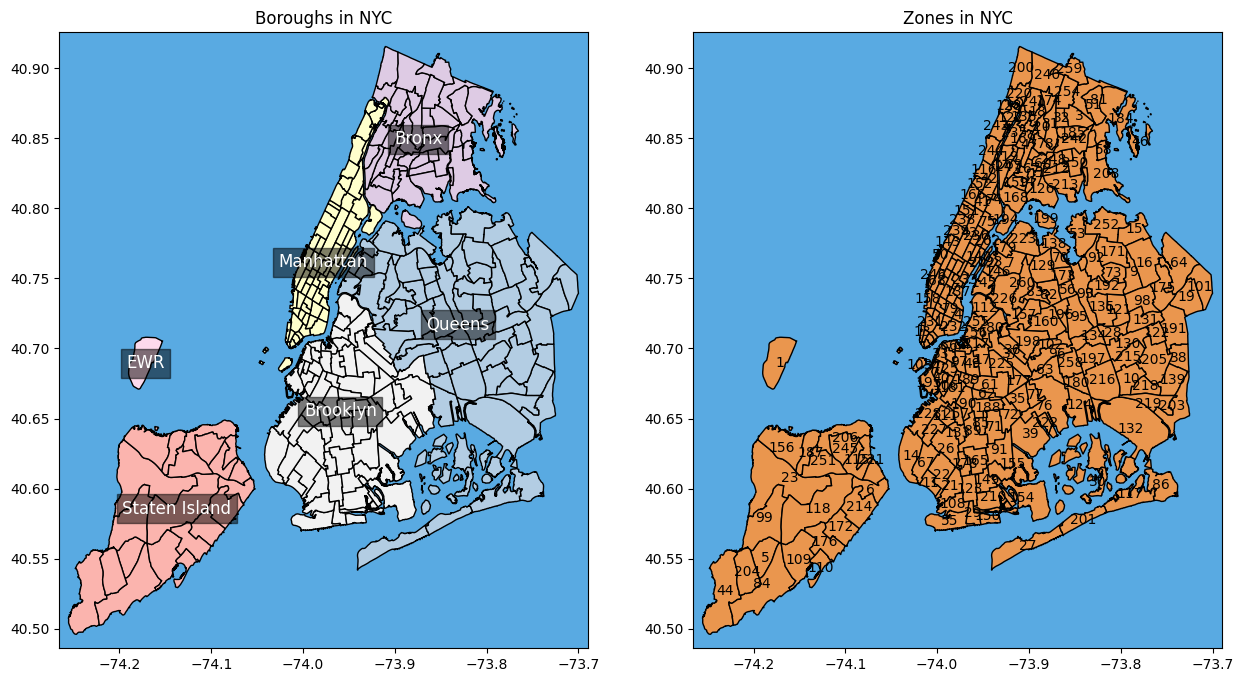

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax = plt.subplot(1, 2, 1)
ax.set_title("Boroughs in NYC")
draw_region_map(ax, sf, shp_dic)
ax = plt.subplot(1, 2, 2)
ax.set_title("Zones in NYC")
draw_zone_map(ax, sf, shp_dic)

### Exercici F

+ Ara teniu dos dataframe que necessitem unir. Utilitza la funció *merge* de Pandas per crear un nou dataframe (conserva el dataframe `df`), anomenat `merge`, que contingui la longitud i latitud (del punt de recollida i del punt de destí) a cada fila.

In [64]:
merge = df.merge(df_loc[['LocationID', 'longitude', 'latitude']], left_on='PULocationID', right_on='LocationID', how='left')
merge.rename(columns={'longitude': 'pickup_longitude', 'latitude': 'pickup_latitude'}, inplace=True)
merge.drop('LocationID', axis=1, inplace=True)

merge = merge.merge(df_loc[['LocationID', 'longitude', 'latitude']], left_on='DOLocationID', right_on='LocationID', how='left')
merge.rename(columns={'longitude': 'dropoff_longitude', 'latitude': 'dropoff_latitude'}, inplace=True)
merge.drop('LocationID', axis=1, inplace=True)


In [65]:
merge.shape

(1145747, 23)

In [66]:
merge.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,year,...,pickup_day,dropoff_day,pickup_week,dropoff_week,trip_duration,speed,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,2.41,151,239,1,6.65,9.45,2019,...,1,1,1,1,0.11,21.91,-73.968222,40.797859,-73.978732,40.784025
1,2019-01-01 00:43:00,2019-01-01 00:52:16,1.0,2.57,238,236,1,8.07,12.06,2019,...,1,1,1,1,0.15,17.13,-73.973031,40.791783,-73.957010,40.780440
2,2019-01-01 00:30:01,2019-01-01 00:33:50,1.0,1.11,143,239,2,4.75,5.98,2019,...,1,1,1,1,0.06,18.50,-73.988457,40.775785,-73.978732,40.784025
3,2019-01-01 00:34:48,2019-01-01 00:46:16,2.0,3.23,236,74,1,9.50,12.24,2019,...,1,1,1,1,0.19,17.00,-73.957010,40.780440,-73.937410,40.805613
4,2019-01-01 00:49:44,2019-01-01 01:07:18,2.0,5.63,263,164,1,13.77,18.00,2019,...,1,1,1,1,0.29,19.41,-73.951008,40.778766,-73.985684,40.749083


## 7. Quines zones de NY tenen més recollides i quines zones tenen més arribades?

En aquest apartat volem conèixer i visualitzar les zones on els taxis són més utilitzats.

El primer pas és ordenar i guardar en una variable els llocs més comuns en la recollida i el destí.

### Exercici G
+  Escriu una funció `show_top_n` que imprimeix els 5 llocs més freqüents de recollida i els 5 llocs més freqüents d'arribada, per cada any.

In [67]:
n_top = 5
def show_top_n(df, column, df_loc, n_top = n_top):
    """
    Mostra els n llocs més usuals per any

    Params
    ======
    :df: DataFrame amb les dades
    :column: String amb el nom de la columna amb les dades
    :df_loc: DataFrame amb les dades geologiques
    :n_top: Enter amb el nombre de llocs a mostrar
    """

    # Selecciona els index de les localitzacions més usuals
    locations = df.groupby('year')[column].apply(lambda group:
                                                        group.value_counts().head(n_top).index.values)
    # Mostra el nom de les localitzacions més usuals
    for l in locations.values:
        print(df_loc[df_loc['OBJECTID'].isin(l)]['zone'])


In [68]:
top_pu = df.copy()
show_top_n(top_pu, 'PULocationID', df_loc)


131              JFK Airport
160           Midtown Center
161             Midtown East
235    Upper East Side North
236    Upper East Side South
Name: zone, dtype: object
160                  Midtown Center
161                    Midtown East
185    Penn Station/Madison Sq West
235           Upper East Side North
236           Upper East Side South
Name: zone, dtype: object
131                     JFK Airport
160                  Midtown Center
185    Penn Station/Madison Sq West
235           Upper East Side North
236           Upper East Side South
Name: zone, dtype: object


In [69]:
top_do = df.copy()
show_top_n(top_do, 'DOLocationID', df_loc)

160           Midtown Center
161             Midtown East
169              Murray Hill
235    Upper East Side North
236    Upper East Side South
Name: zone, dtype: object
141      Lincoln Square East
160           Midtown Center
169              Murray Hill
235    Upper East Side North
236    Upper East Side South
Name: zone, dtype: object
160           Midtown Center
169              Murray Hill
235    Upper East Side North
236    Upper East Side South
238    Upper West Side South
Name: zone, dtype: object


Visualitzem amb un mapa de calor quines són les zones més recurrents.

/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


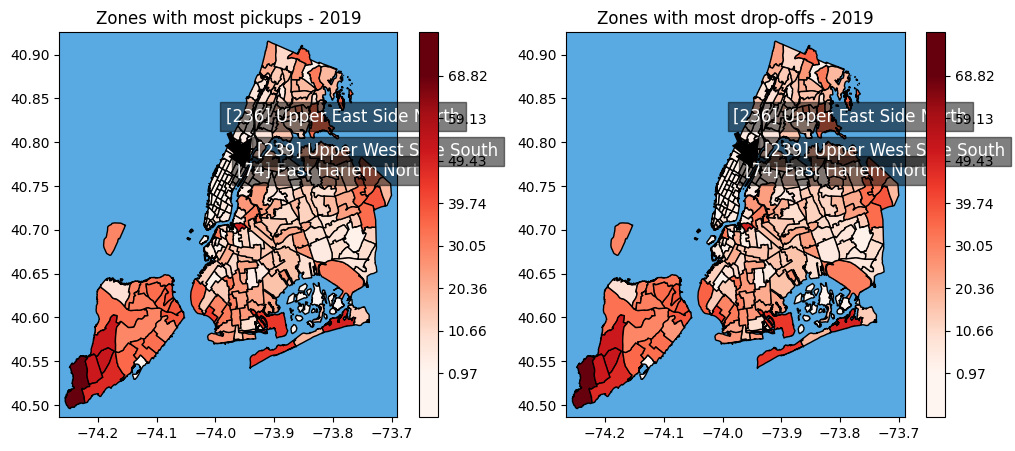

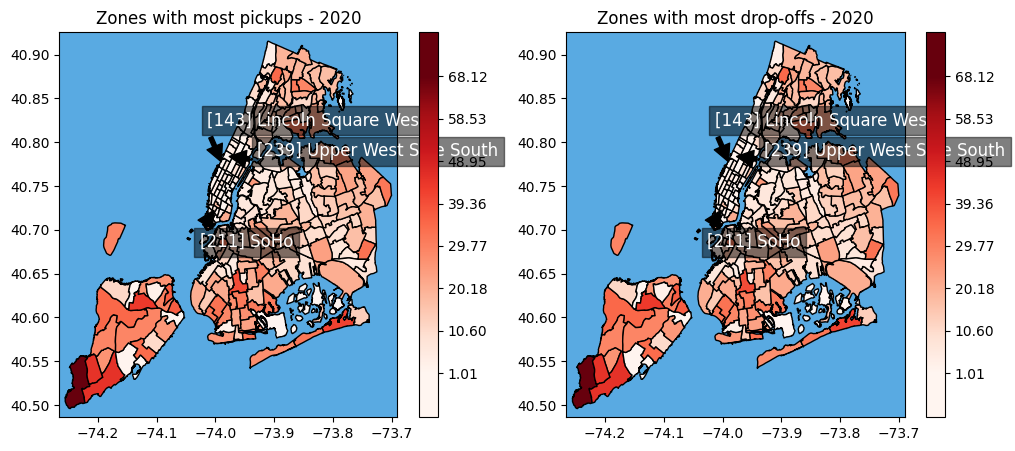

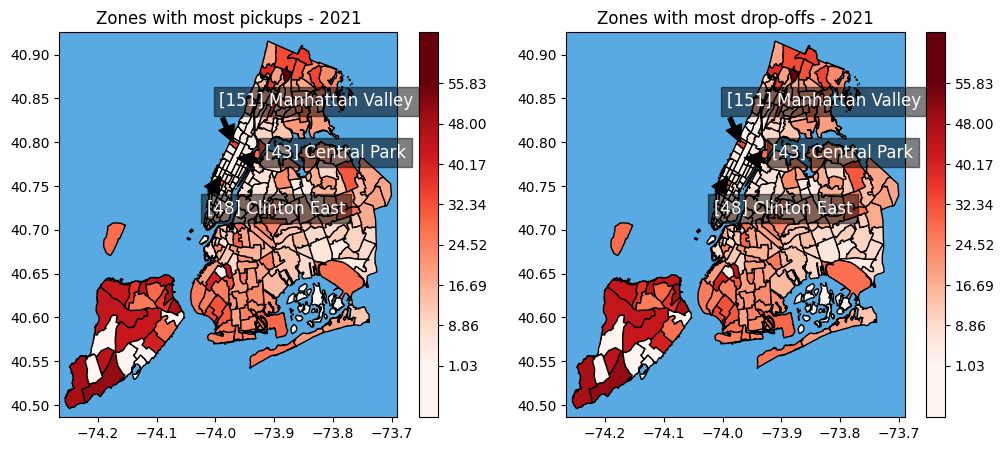

In [70]:
for year in YEARS:

    PUcount = {k:v for k, v in top_pu[top_pu['year'] == year][['DOLocationID', 'trip_distance']].values}

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    ax = plt.subplot(1, 2, 1)
    ax.set_title(f"Zones with most pickups - {year}")
    draw_zone_map(ax, sf, shp_dic, heat=PUcount, text=list(PUcount.keys())[:3])
    ax = plt.subplot(1, 2, 2)
    ax.set_title(f"Zones with most drop-offs - {year}")
    draw_zone_map(ax, sf, shp_dic, heat=PUcount, text=list(PUcount.keys())[:3])

+ Per què creieu que la zona de Manhattan té més quantitat de viatges?

> Resposta: Tenint en compte que Manhattan es la capital de la ciutat, per tant on es situen la major part dels negocis i la major part de la població, es normal que hi hagi un nombre tan elevat de viatjes per aques districte.

## 8. Hospitals

Com ha canviat la destinació dels viatges? Hi ha més viatges a les zones on hi ha grans hospitals?

A la següent cel·la us donem la creació manual d'un DataFrame amb la localització més important dels hospitals de Nova York.

In [71]:
hospitals = [('New York’s Presbyterian Lower Manhattan Hospital, NYC, NY, USA', '40.710255', '-74.005058'),
('Manhattan Gastroenterology, NYC, NY, USA', '40.778259', '-73.958092'),
('Stem Cell Therapy Hospital, NYC, NY, USA', '40.601517', '-73.961067'),
('Park Avenue Smiles, Yonkers, NYC, NY, USA', '40.945873', '-73.890671'),
('Cosmetic Dentistry Center, NYC, NY, USA', '40.629234', '-74.026077'),
('Envy Smile Dental Spa, Brooklyn, NYC, NY, USA', '40.607059', '-73.960144'),
('VIVA EVE, Forest Hills, NYC, NY, USA', '40.734291', '-73.849434'),
('Forest Hills Medical Services, Queens, NYC, NY, USA', '40.734310', '-73.849510'),
('Professional Gynecological Services, Brooklyn, NY, NY, USA', '40.689747', '-73.982346'),
('Manhattan Womens Health & Wellness, New York, NY, USA', '40.741997', '-73.986107'),
('Brooklyn Abortion Clinic, Brooklyn, NY, New York, USA', '40.689743', '-73.982368'),
('Brooklyn GYN Place, Brooklyn, NY, USA', '40.692696', '-73.993584'),
('Americas Holistic Doctor, NYC, NY, USA', '40.742531', '-73.985489'),
('NJS Physical Medicine & Rehabilitation, Brooklyn, NY, USA', '40.641621', '-73.956734'),
('DHD Medical, Brooklyn New York, USA', '40.625568', '-73.918320'),
('Workers Compensation Doctor, New York, NY, USA', '40.652225', '-74.006104'),]

hospitals = pd.DataFrame(hospitals, columns = ['Place Name', 'Latitude', 'Longitude'])
hospitals['Latitude'] = hospitals['Latitude'].astype(float)
hospitals['Longitude'] = hospitals['Longitude'].astype(float)
hospitals.head()

,Place Name,Latitude,Longitude
0,New York’s Presbyterian Lower Manhattan Hospit...,40.710255,-74.005058
1,"Manhattan Gastroenterology, NYC, NY, USA",40.778259,-73.958092
2,"Stem Cell Therapy Hospital, NYC, NY, USA",40.601517,-73.961067
3,"Park Avenue Smiles, Yonkers, NYC, NY, USA",40.945873,-73.890671
4,"Cosmetic Dentistry Center, NYC, NY, USA",40.629234,-74.026077


### Exercici H

+ Utilitza la latitud i longitud de cada hospital i la de les zones del dataframe *merge* per veure la relació entre la distribució dels hospitals i la dels viatges. Per fer-ho utilitza els gràfics de dispersió. Recorda que s'entendrà millor si els punts són transparents (paràmetre *alpha*).

+ Després repeteix el mateix gràfic però separat per any.

In [72]:
def scatter_locations(merge, hospitals):
    """
    Mostra la distribució dels hospitals i les destinacions dels taxis
    """
    # Calculem les coordenades mitjanes de recollida (pickup) i destinacio (dropoff) per a cada zona.
    pickup_coords = merge.groupby('PULocationID')[['pickup_latitude', 'pickup_longitude']].mean()
    dropoff_coords = merge.groupby('DOLocationID')[['dropoff_latitude', 'dropoff_longitude']].mean()

    # Unim les coordenades de recollida i destinacio per a cada zona.
    zone_coords = pd.concat([pickup_coords, dropoff_coords], axis=1)

    # Creem un gràfic de dispersió amb punts transparents per mostrar la relació.
    plt.figure(figsize=(10, 6))
    plt.scatter(zone_coords['pickup_longitude'], zone_coords['pickup_latitude'], label='Recollida', color = 'blue',alpha=0.5)
    plt.scatter(zone_coords['dropoff_longitude'], zone_coords['dropoff_latitude'], label='Destinació',color= 'green', alpha=0.5)
    plt.scatter(hospitals['Longitude'], hospitals['Latitude'], label='Hospitals', color='red', marker='x', s=100)
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.title('Distribució de Viatges i Hospitals')
    plt.legend()
    plt.grid(True)
    plt.show()


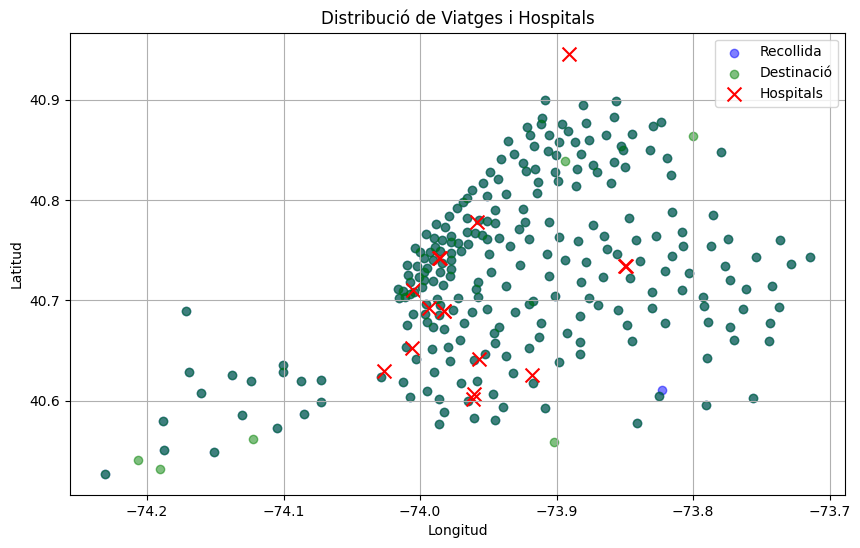

In [73]:
scatter_locations(merge, hospitals)

In [74]:
def scatter_locations_per_year(merge, hospitals):
    """Funció que mostra la distribució dels hospitals i les destinacions dels taxis"""

    years = merge['year'].unique()
    for year in years:
        #creem un nou frame nomes amb l'any seleccionat
        merge_year = merge[merge['year'] == year]

        # Calculem les coordenades mitjanes de recollida (pickup) i destinacio (dropoff) per a cada zona.
        pickup_coords = merge_year.groupby('PULocationID')[['pickup_latitude', 'pickup_longitude']].mean()
        dropoff_coords = merge_year.groupby('DOLocationID')[['dropoff_latitude', 'dropoff_longitude']].mean()

        # Unim les coordenades de recollida i destinacio per a cada zona.
        zone_coords = pd.concat([pickup_coords, dropoff_coords], axis=1)

        # Creem un gràfic de dispersió amb punts transparents per mostrar la relació.
        plt.figure(figsize=(10, 6))
        plt.scatter(zone_coords['pickup_longitude'], zone_coords['pickup_latitude'], label='Recollida', color = 'blue',alpha=0.5)
        plt.scatter(zone_coords['dropoff_longitude'], zone_coords['dropoff_latitude'], label='Destinació',color= 'green', alpha=0.5)
        plt.scatter(hospitals['Longitude'], hospitals['Latitude'], label='Hospitals', color='red', marker='x', s=100)
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.title(f'Distribució de Viatges i Hospitals - Any {year}')
        plt.legend()
        plt.grid(True)
        plt.show()


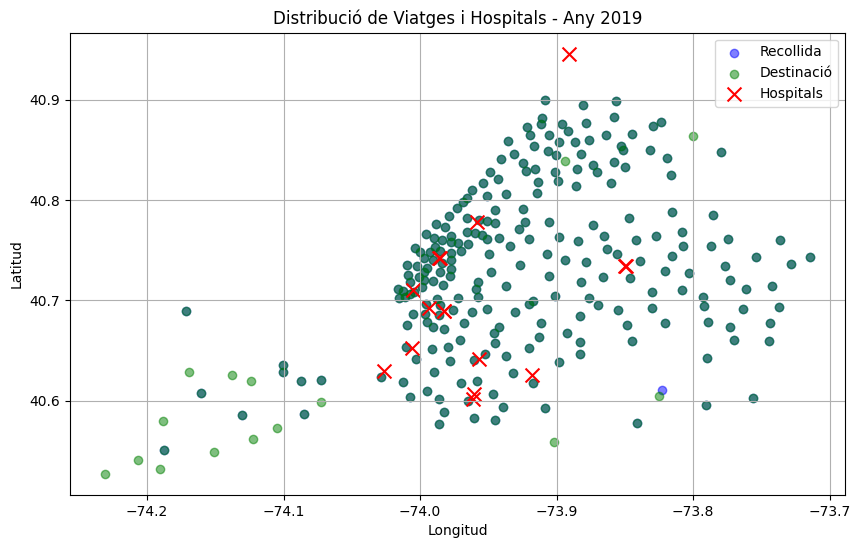

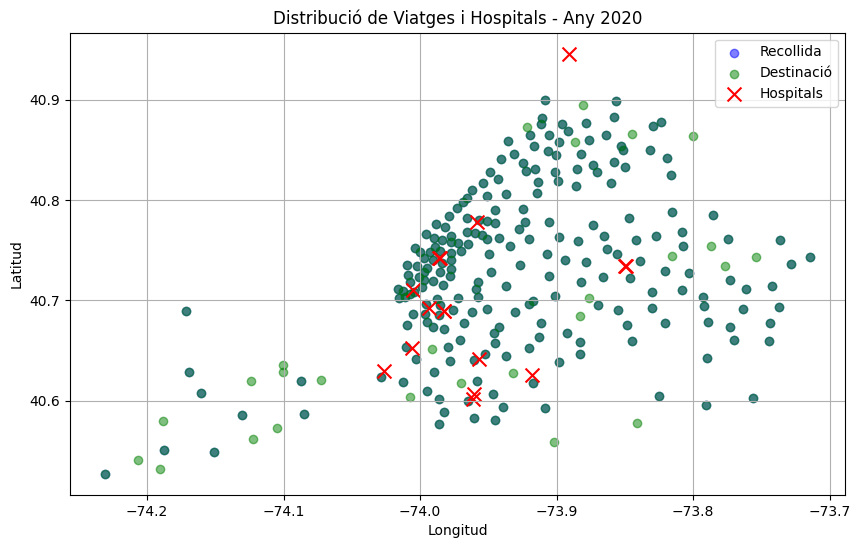

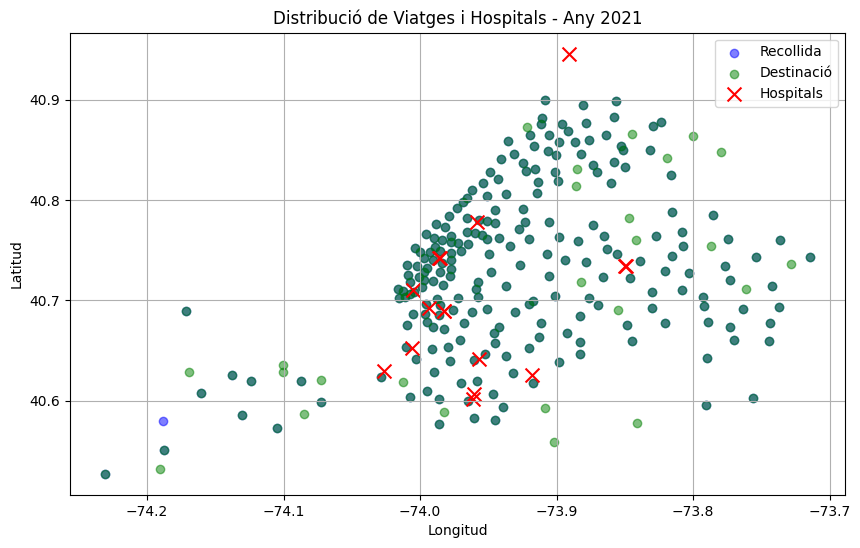

In [75]:
scatter_locations_per_year(merge, hospitals)

* Veus algun comportament interessant per comentar?
> Resposta: La majoria de recollides i destinacions corresponen a ubicacions properes a hospitals, el que té sentit perquè el nombre d'ingresos va augmentar en gran quantitat al inici de la covid.